# July-P2 Batch Oasis Infobyte SIP

# TASK1- Iris Flower Classification


# **1. Data and Packages Loading**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop('Id', axis=1, inplace=True)

# **2. Data Preprocessing**

### The taget variable is 'species'.


In [5]:
iris.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Description

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **3. Data Splitting**

In [8]:
target_var_ = 'Species'
iris[target_var_]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
X = iris.drop(target_var_, axis=1)
y = iris[target_var_]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Model Implimenting**

In [11]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
model=knn.fit(X_train, y_train)

In [12]:
y_pred = knn.predict(X_test)


In [13]:
y_pred.shape

(30,)

## Checking the model
### Ex:-  
### SepalLengthCm = 7
### SepalWidthCm	 = 3.2
### PetalLengthCm  = 4.7
### PetalWidthCm    = 1.4
## Output: Iris-versicolor

In [14]:
data = [7, 3.2, 4.7, 1.4]

In [15]:
model.predict([data])

array(['Iris-versicolor'], dtype=object)

# **5. Model Score**

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Data Visualisation

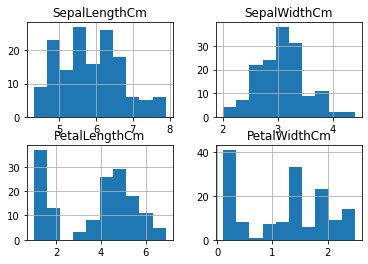

In [17]:
iris.hist()
fig = plt.gcf()
plt.show()

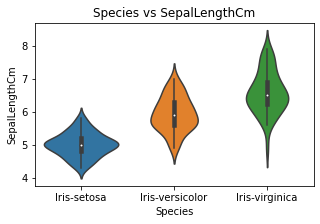

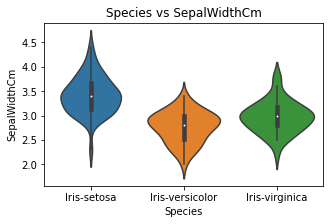

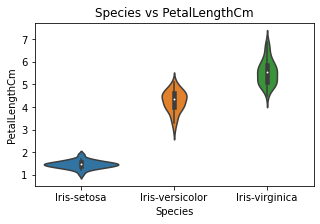

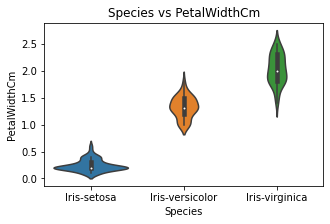

In [18]:
def violin_plot_for_iris(x:pd.DataFrame=None, y:pd.DataFrame=None, data:pd.DataFrame=None):
    plt.figure(figsize=(5,3))
    plt.title(f"Species vs {y}")
    _ = sns.violinplot(x=x, y=y, data=data)
    plt.gcf()
    plt.show()

y_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    
for columns in y_cols:  
    violin_plot_for_iris(x=iris.Species, y=columns, data=iris)

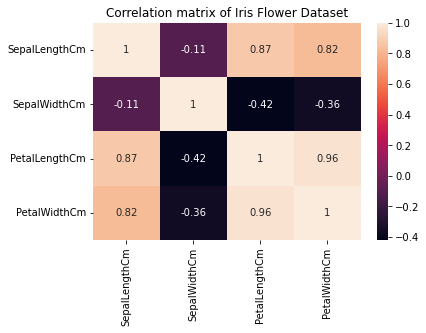

In [19]:
plt.title("Correlation matrix of Iris Flower Dataset")
sns.heatmap(iris.corr(), annot=True)
plt.show()